<br>

## CEIT 418 Data Science Project

As your final data science project for CEIT 418, you will explore an educational dataset, and build a classification machine learning model. As the submission, you should submit in OdtuClass the following items:

1. The url of the Google Colab document, and 
2. The PDF version of the complete notebook. 

Submissions missing any of the files will not be evaluated.


In the first part, mostly you are expected to explore different tables (possible by using functions such as `head`, `shape`, `info`, and `describe`), deal with duplicate records and missing values, and perform some exploratory tasks.

In the second part, you will build a classification model and report its accuracy.


#### Important Information

For any action you take on the data, you should **explain your rationale** (e.g., I took into account colmuns X and Y when detecting duplicates because Z). Also, you should **provide an explanation/interpretation for outputs** produced by your code (e.g., based on this result, A and B columns can be dropped since they carry mostly missing values).

#### About the Dataset

For the final project, you will work on a public educational dataset shared by UK Open University. Although throughout this document you will be provided with sufficient information about this public dataset, you are strongly recommended to refer to https://analyse.kmi.open.ac.uk/open_dataset for more detailed information.

There is also Kaggle page where you can see some analysis performed shared by other publicly. I think they can be also helpful if you want to explore the dataset beyond this assignment. 
https://www.kaggle.com/datasets/rocki37/open-university-learning-analytics-dataset
<br>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Exploratory Analysis

### 1.1. Courses Table

Courses table (`courses.csv`) contains the list of all available modules and their presentations. 

The columns are:
* **code_module** – code name of the module, which serves as the identifier.
* **code_presentation** – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.
* **length** - length of the module-presentation in days.

The structure of B and J presentations may differ and therefore it is good practice to analyse the B and J presentations separately. Nevertheless, for some presentations the corresponding previous B/J presentation do not exist and therefore the J presentation must be used to inform the B presentation or vice versa. In the dataset this is the case of CCC, EEE and GGG modules.

In [2]:
courses = pd.read_csv("dataset/courses.csv")
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [3]:
courses.shape

(22, 3)

**TASK1:** Identify and treat duplicate/missing values (if there is any).

In [4]:
courses.isnull().any() #There is no null value

code_module                   False
code_presentation             False
module_presentation_length    False
dtype: bool

In [5]:
courses.duplicated().any() # There is no duplicated value

False

**TASK2:** Find out how many courses started in February vs October, and compare their length. Interpret the results.

In [6]:
courses_JB = courses["code_presentation"].apply(lambda x: x[-1]).value_counts()
courses_JB

J    13
B     9
Name: code_presentation, dtype: int64

In [7]:
courses_JB["J"] - courses_JB["B"] # J - October, B - February
# October semester greater than February semester

4

**TASK3:** Find the courses that were offered two years consecutively in the same semester (such as, 2013B and 2014B, or 2013J and 2014J), and check if they had the same length or not.

In [8]:
courses["year"] = courses["code_presentation"].apply(lambda x: int(x[:-1])) # Add dataframe year integer type
courses["term"] = courses["code_presentation"].apply(lambda x: x[-1]) # Add dataframe term only

courses_sort = courses.sort_values(["term","code_module"]) # First sort the dataframe wrt term and code_module

courses_sort["code_comp"] = courses_sort["code_module"].shift()
courses_sort["length_comp"] = courses_sort["module_presentation_length"].shift()
courses_sort["year_comp"] = courses_sort["year"].shift()
courses_sort["term_comp"] = courses_sort["term"].shift()
# These four codes write the above data next to the lines 
# Since first row has no above data all values are NaN

In [9]:
courses_sort.head(5)

,code_module,code_presentation,module_presentation_length,year,term,code_comp,length_comp,year_comp,term_comp
4,BBB,2013B,240,2013,B,NaN,NaN,NaN,NaN
5,BBB,2014B,234,2014,B,BBB,240.0,2013.0,B
7,CCC,2014B,241,2014,B,BBB,234.0,2014.0,B
10,DDD,2013B,240,2013,B,CCC,241.0,2014.0,B
11,DDD,2014B,241,2014,B,DDD,240.0,2013.0,B


In [10]:
coursesConsSem = courses_sort[(courses_sort.code_module == courses_sort.code_comp) &
            (courses_sort.year == (courses_sort.year_comp)+1 ) &
            (courses_sort.term == courses_sort.term_comp)]
# filtering two years consecutively in the same semester

In [11]:
coursesConsSem["diffLength"] = coursesConsSem.module_presentation_length - coursesConsSem.length_comp
coursesConsSem["isSame"] = coursesConsSem["diffLength"] == 0
coursesConsSem
# differences between 2014 - 2013

C:\Users\sinan\AppData\Local\Temp\ipykernel_21784\962559390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coursesConsSem["diffLength"] = coursesConsSem.module_presentation_length - coursesConsSem.length_comp
C:\Users\sinan\AppData\Local\Temp\ipykernel_21784\962559390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coursesConsSem["isSame"] = coursesConsSem["diffLength"] == 0


,code_module,code_presentation,module_presentation_length,year,term,code_comp,length_comp,year_comp,term_comp,diffLength,isSame
5,BBB,2014B,234,2014,B,BBB,240.0,2013.0,B,-6.0,False
11,DDD,2014B,241,2014,B,DDD,240.0,2013.0,B,1.0,False
18,FFF,2014B,241,2014,B,FFF,240.0,2013.0,B,1.0,False
1,AAA,2014J,269,2014,J,AAA,268.0,2013.0,J,1.0,False
3,BBB,2014J,262,2014,J,BBB,268.0,2013.0,J,-6.0,False
9,DDD,2014J,262,2014,J,DDD,261.0,2013.0,J,1.0,False
13,EEE,2014J,269,2014,J,EEE,268.0,2013.0,J,1.0,False
16,FFF,2014J,269,2014,J,FFF,268.0,2013.0,J,1.0,False
20,GGG,2014J,269,2014,J,GGG,261.0,2013.0,J,8.0,False


**TASK4:** Find the courses that were offered in two consecutive semesters of the same year (such as, 2013B and 2013J, or 2014B and 2014J), and check if they had the same length or not.

In [12]:
courses_sort2 = courses.sort_values(by = ["year","code_module","term"])
courses_sort2["code_comp"] = courses_sort2["code_module"].shift()
courses_sort2["length_comp"] = courses_sort2["module_presentation_length"].shift()
courses_sort2["year_comp"] = courses_sort2["year"].shift()
courses_sort2["term_comp"] = courses_sort2["term"].shift()
courses_sort2.head(5)
# like a tast3

,code_module,code_presentation,module_presentation_length,year,term,code_comp,length_comp,year_comp,term_comp
0,AAA,2013J,268,2013,J,NaN,NaN,NaN,NaN
4,BBB,2013B,240,2013,B,AAA,268.0,2013.0,J
2,BBB,2013J,268,2013,J,BBB,240.0,2013.0,B
10,DDD,2013B,240,2013,B,BBB,268.0,2013.0,J
8,DDD,2013J,261,2013,J,DDD,240.0,2013.0,B


In [13]:
coursesConsSem2 = courses_sort2[(courses_sort2.code_module == courses_sort2.code_comp)  &
                               (courses_sort2.year == (courses_sort2.year_comp)) &
                               (courses_sort2.term != courses_sort2.term_comp)]
# Filtering data

In [14]:
coursesConsSem2["diffLength"] = coursesConsSem2.module_presentation_length - coursesConsSem2.length_comp
coursesConsSem2["isSame"] = coursesConsSem2["diffLength"] == 0
coursesConsSem2

C:\Users\sinan\AppData\Local\Temp\ipykernel_21784\1106656448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coursesConsSem2["diffLength"] = coursesConsSem2.module_presentation_length - coursesConsSem2.length_comp
C:\Users\sinan\AppData\Local\Temp\ipykernel_21784\1106656448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coursesConsSem2["isSame"] = coursesConsSem2["diffLength"] == 0


,code_module,code_presentation,module_presentation_length,year,term,code_comp,length_comp,year_comp,term_comp,diffLength,isSame
2,BBB,2013J,268,2013,J,BBB,240.0,2013.0,B,28.0,False
8,DDD,2013J,261,2013,J,DDD,240.0,2013.0,B,21.0,False
15,FFF,2013J,268,2013,J,FFF,240.0,2013.0,B,28.0,False
3,BBB,2014J,262,2014,J,BBB,234.0,2014.0,B,28.0,False
6,CCC,2014J,269,2014,J,CCC,241.0,2014.0,B,28.0,False
9,DDD,2014J,262,2014,J,DDD,241.0,2014.0,B,21.0,False
13,EEE,2014J,269,2014,J,EEE,241.0,2014.0,B,28.0,False
16,FFF,2014J,269,2014,J,FFF,241.0,2014.0,B,28.0,False
20,GGG,2014J,269,2014,J,GGG,241.0,2014.0,B,28.0,False


### 1.2. Student Info Table

StudentInfo (`studentInfo.csv`) file contains **demographic** information about the students together with their final result. File contains the following columns:

* **code_module** – an identification code for a module on which the student is registered.
* **code_presentation** - the identification code of the presentation during which the student is registered on the module.
* **id_student** – a unique identification number for the student.
* **gender** – the student’s gender.
* **region** – identifies the geographic region, where the student lived while taking the module-presentation.
* **highest_education** – highest student education level on entry to the module presentation.
* **imd_band** – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
* **age_band** – band of the student’s age.
* **num_of_prev_attempts** – the number times the student has attempted this module.
* **studied_credits** – the total number of credits for the modules the student is currently studying.
* **disability** – indicates whether the student has declared a disability.
* **final_result** – student’s final result in the module-presentation.

In [15]:
studentInfo = pd.read_csv("dataset/studentInfo.csv")
studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


**TASK1:** Identify and treat duplicate/missing values (if there is any)

In [16]:
studentInfo.shape

(32593, 12)

In [17]:
studentInfo.duplicated().any() # No duplicated value

False

In [18]:
studentInfo.isnull().any() # There is a na value wrt imd_band

code_module             False
code_presentation       False
id_student              False
gender                  False
region                  False
highest_education       False
imd_band                 True
age_band                False
num_of_prev_attempts    False
studied_credits         False
disability              False
final_result            False
dtype: bool

In [19]:
studentInfo = studentInfo.dropna() # Drop rows which inculude NaN values

In [20]:
studentInfo.isnull().any() # Now there is no NaN value

code_module             False
code_presentation       False
id_student              False
gender                  False
region                  False
highest_education       False
imd_band                False
age_band                False
num_of_prev_attempts    False
studied_credits         False
disability              False
final_result            False
dtype: bool

In [21]:
studentInfo.shape

(31482, 12)

**TASK2:** Treating categorical variables.

For this table, besides fixing any potential issue about duplicate/missing values, you are expected to explore the categorical variables: such as `highest_education`, `imd_band`, and `age_band`.

In particular, you may want to check if some categories of `highest_education`, `imd_band`, `age_band` variables (e.g., *Post Graduate Qualification* in `highest_education`) contain few instances. In such cases, you may need to merge the minority categories with a major category and even dedice to create a new set of (fewer) categories based on the existing ones. In some cases, you may even want to decide the reduce the number of categories (if you think they are many).

As long as you provide the rationale, you can decide such details by yourself.

In [22]:
studentInfo["highest_education"].value_counts()
# A Level is like a high school level or pre-university education.
# HE Qualification is  Higher Education Qualification

A Level or Equivalent          13762
Lower Than A Level             12762
HE Qualification                4444
No Formal quals                  328
Post Graduate Qualification      186
Name: highest_education, dtype: int64

In [23]:
studentInfo.loc[studentInfo["highest_education"] == "HE Qualification", "highest_education"] = "Above Than A Level"
studentInfo.loc[studentInfo["highest_education"] == "Post Graduate Qualification", "highest_education"] = "Above Than A Level"
studentInfo.loc[studentInfo["highest_education"] == "No Formal quals", "highest_education"] = "Lower Than A Level"
# "Above Than A Level inculudes" "HE Qualification" and "Post Graduate Qualification"
# I add No Formal Quals into Lower Than A Level

In [24]:
studentInfo.value_counts("highest_education")

highest_education
A Level or Equivalent    13762
Lower Than A Level       13090
Above Than A Level        4630
dtype: int64

In [25]:
studentInfo.value_counts("imd_band")

imd_band
20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
dtype: int64

In [26]:
studentInfo.loc[studentInfo["imd_band"] == "0-10%", "imd_band"] = "0-20%"
studentInfo.loc[studentInfo["imd_band"] == "10-20", "imd_band"] = "0-20%"
studentInfo.loc[studentInfo["imd_band"] == "20-30%", "imd_band"] = "20-40%"
studentInfo.loc[studentInfo["imd_band"] == "30-40%", "imd_band"] = "20-40%"
studentInfo.loc[studentInfo["imd_band"] == "40-50%", "imd_band"] = "40-60%"
studentInfo.loc[studentInfo["imd_band"] == "50-60%", "imd_band"] = "40-60%"
studentInfo.loc[studentInfo["imd_band"] == "60-70%", "imd_band"] = "60-80%"
studentInfo.loc[studentInfo["imd_band"] == "70-80%", "imd_band"] = "60-80%"
studentInfo.loc[studentInfo["imd_band"] == "80-90%", "imd_band"] = "80-100%"
studentInfo.loc[studentInfo["imd_band"] == "90-100%", "imd_band"] = "80-100%"

In [27]:
studentInfo.value_counts("imd_band")
# increased the range to 20

imd_band
20-40%     7193
0-20%      6827
40-60%     6380
60-80%     5784
80-100%    5298
dtype: int64

In [28]:
studentInfo.value_counts("age_band")

age_band
0-35     22272
35-55     9009
55<=       201
dtype: int64

In [29]:
studentInfo.loc[studentInfo["age_band"] == "55<=", "age_band"] = "35-55"

In [30]:
studentInfo.loc[studentInfo["age_band"] == "35-55", "age_band"] = "35<"

In [31]:
studentInfo.value_counts("age_band")
# I decrease the age border 35.

age_band
0-35    22272
35<      9210
dtype: int64

**TASK3:** Demographic Information and Performance Levels

More importantly for this table you are expected to explore various relationships between `final_result` and **at least three** categorical variable (e.g., did students with HE qualification perform better, did students with low `imd_band` withdraw more often, etc.). For this purpose you can visualize data and compute some basic statistics. 

In [32]:
studentInfo.value_counts("final_result")

final_result
Pass           11830
Withdrawn       9920
Fail            6907
Distinction     2825
dtype: int64

In [33]:
studentInfo.pivot_table(index = "highest_education", columns = "final_result", aggfunc='count').region
# Lower Than A Level mostly withdraw

final_result,Distinction,Fail,Pass,Withdrawn
highest_education,,,,
A Level or Equivalent,1441,2674,5658,3989
Above Than A Level,700,780,1883,1267
Lower Than A Level,684,3453,4289,4664


In [34]:
studentInfo.pivot_table(index = "age_band", columns = "final_result", aggfunc='count').id_student


final_result,Distinction,Fail,Pass,Withdrawn
age_band,,,,
0-35,1752,5135,8130,7255
35<,1073,1772,3700,2665


array([<AxesSubplot:ylabel='Distinction'>, <AxesSubplot:ylabel='Fail'>,
       <AxesSubplot:ylabel='Pass'>, <AxesSubplot:ylabel='Withdrawn'>],
      dtype=object)

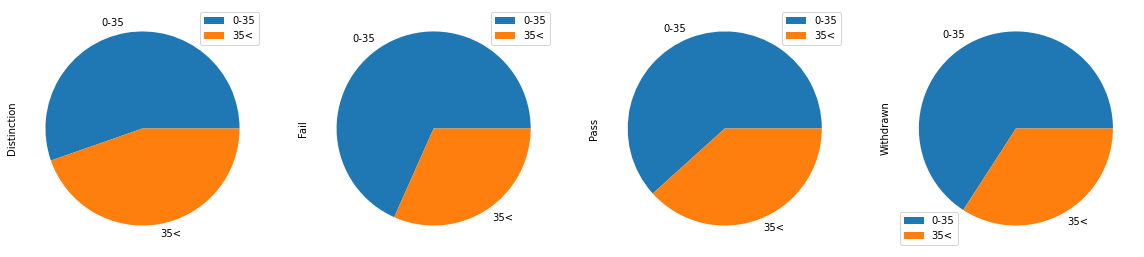

In [35]:
studentInfo.pivot_table(index = "age_band", columns = "final_result", aggfunc='sum').id_student.plot(kind = "pie", subplots = True, figsize = (20,20))
# At age 35<, although the data is less than 0-35, it is almost the same in distinction

In [36]:
studentInfo.pivot_table(index = "imd_band", columns = "final_result", aggfunc='count').region

final_result,Distinction,Fail,Pass,Withdrawn
imd_band,,,,
0-20%,359,1828,2163,2477
20-40%,578,1628,2571,2416
40-60%,590,1398,2451,1941
60-80%,612,1137,2379,1656
80-100%,686,916,2266,1430


### 1.3. Registration Table

Registration table (`studentRegistration.csv`) contains information about the time when the student registered for the module presentation. For students who unregistered the date of unregistration is also recorded. File contains five columns:

* **code_module** – an identification code for a module.
* **code_presentation** - the identification code of the presentation.
* **id_student** – a unique identification number for the student.
* **date_registration** – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
* **date_unregistration** – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have *Withdrawal* as the value of the `final_result` column in the `studentInfo.csv` file.

In [37]:
studentReg = pd.read_csv("dataset/studentRegistration.csv")
studentReg.head(8)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
5,AAA,2013J,38053,-110.0,NaN
6,AAA,2013J,45462,-67.0,NaN
7,AAA,2013J,45642,-29.0,NaN


**TASK1:** As the first task, you need to ensure that there are no conflicts between `studentRegistration.csv` and `studentInfo.csv` dataset in terms of **Withdrawal** status of *unregistered* students. For example, if a student unregistered from a course at some point (which can be found in "studentRegistration.csv"), his/her `final_result` should be **Withdrawal**. Otherwise, it should be changed to Withdrawal. 

In [38]:
studentRegCon = pd.concat([studentReg,studentInfo["final_result"]],axis = 1,join = "inner") 
studentRegCon
#Added registration table final results

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result
0,AAA,2013J,11391,-159.0,NaN,Pass
1,AAA,2013J,28400,-53.0,NaN,Pass
2,AAA,2013J,30268,-92.0,12.0,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,Pass
4,AAA,2013J,32885,-176.0,NaN,Pass
...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,Fail
32589,GGG,2014J,2645731,-23.0,NaN,Distinction
32590,GGG,2014J,2648187,-129.0,NaN,Pass
32591,GGG,2014J,2679821,-49.0,101.0,Withdrawn


In [39]:
studentRegCon.loc[(studentRegCon.date_unregistration > 0) & (studentRegCon.final_result != "Withdrawn"), "final_result"] = "Withdrawn"
# fix erroneous data

In [40]:
studentRegCon[(studentRegCon.date_unregistration > 0) & (studentRegCon.final_result != "Withdrawn")].shape
# Fixed

(0, 6)

**TASK2:** Categorize students based on the day they registered for a course. In other words, you need to **bin** the registration data based on the `date_registration` column. Just to illustrate this idea, you can group students into categories such as "Very early birds", "early birds", "in-time", and "late-comers". You can use the categories given in this example or create your own categories. 

In [41]:
cat = pd.cut(studentRegCon["date_registration"],
             bins = [studentRegCon["date_registration"].min(),-21,-7,0,7,studentRegCon["date_registration"].max()],
            labels = ["Very early birds", "early birds", "in time","late comers","Very late comers"])
pd.value_counts(cat)
# registered min 3 weeks earlier called "Very Early Birds"
# registered 3 weeks before classes start called "Early Birds"
# registered in 1 week before classes start is called "In Time"
# registered in 1 week after classes start is called "Late Comers"
# registered min 1 weeks after classes start is called "Very late Comers"

Very early birds    28477
early birds          2409
in time               326
late comers           135
Very late comers       89
Name: date_registration, dtype: int64

In [42]:
studentRegCon = pd.concat([studentRegCon,cat.rename("regist_time")],axis = 1)
studentRegCon
# Add categories into dataframe

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result,regist_time
0,AAA,2013J,11391,-159.0,NaN,Pass,Very early birds
1,AAA,2013J,28400,-53.0,NaN,Pass,Very early birds
2,AAA,2013J,30268,-92.0,12.0,Withdrawn,Very early birds
3,AAA,2013J,31604,-52.0,NaN,Pass,Very early birds
4,AAA,2013J,32885,-176.0,NaN,Pass,Very early birds
...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN,Fail,in time
32589,GGG,2014J,2645731,-23.0,NaN,Distinction,Very early birds
32590,GGG,2014J,2648187,-129.0,NaN,Pass,Very early birds
32591,GGG,2014J,2679821,-49.0,101.0,Withdrawn,Very early birds


**TASK3:** Categorize students based on the day they *unregistered* a course. In other words, you need to **bin** registration date based on the `date_unregistration` column. You are free to determine the number and the name of the categories (as in Task1).

In [43]:
minUnreg = studentRegCon["date_unregistration"].min()
maxUnreg = studentRegCon["date_unregistration"].max()

cat2 = pd.cut(studentRegCon.date_unregistration,
             bins = [minUnreg, 0, 50, 150, maxUnreg],
             labels = ["Before Start","Early WD","Before Midterm", "After Midterm"])

studentRegCon = pd.concat([studentRegCon,cat2.rename("WD_time")],axis = 1)
# WD before classes start "Before Start"
# WD between (0-50) "Early WD"
# WD between (50-150) "Before Midterm"
# WD after 150th day "After Midterm"

In [44]:
studentRegCon.head(7)

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result,regist_time,WD_time
0,AAA,2013J,11391,-159.0,NaN,Pass,Very early birds,NaN
1,AAA,2013J,28400,-53.0,NaN,Pass,Very early birds,NaN
2,AAA,2013J,30268,-92.0,12.0,Withdrawn,Very early birds,Early WD
3,AAA,2013J,31604,-52.0,NaN,Pass,Very early birds,NaN
4,AAA,2013J,32885,-176.0,NaN,Pass,Very early birds,NaN
5,AAA,2013J,38053,-110.0,NaN,Pass,Very early birds,NaN
6,AAA,2013J,45462,-67.0,NaN,Pass,Very early birds,NaN


In [45]:
studentRegCon.shape

(31482, 8)

In [46]:
studentRegCon.WD_time = studentRegCon.WD_time.astype(str)

In [47]:
studentRegCon.loc[studentRegCon.WD_time == "nan", "WD_time"] = "No WD" # Change NaN value into No WD

In [48]:
studentRegCon.WD_time = studentRegCon.WD_time.astype("category")

In [49]:
studentRegCon.value_counts("WD_time")

WD_time
No WD             21646
Before Start       3039
Early WD           2681
Before Midterm     2633
After Midterm      1483
dtype: int64

In [50]:
studentRegCon.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result,regist_time,WD_time
0,AAA,2013J,11391,-159.0,NaN,Pass,Very early birds,No WD
1,AAA,2013J,28400,-53.0,NaN,Pass,Very early birds,No WD
2,AAA,2013J,30268,-92.0,12.0,Withdrawn,Very early birds,Early WD
3,AAA,2013J,31604,-52.0,NaN,Pass,Very early birds,No WD
4,AAA,2013J,32885,-176.0,NaN,Pass,Very early birds,No WD


**TASK4:** Choose three variables from demographic data (`studentInfo.csv`), and explore if there is some relationship between students' registration/unregistration behaviour and the chosen demographic variables (e.g., did students from HE registered early? did male students unregistered sooner than female students?). You are free in exploring the data to answer similar questions that you determine. If you find no relationship, this is totally fine. Just remember that your analysis should be accompanied with meaningful interpretations.

In [51]:
imdWD = pd.crosstab(studentInfo.imd_band,studentRegCon.WD_time)
imdWD.head()

WD_time,After Midterm,Before Midterm,Before Start,Early WD,No WD
imd_band,,,,,
0-20%,341,618,807,689,4372
20-40%,357,645,724,668,4799
40-60%,274,524,596,536,4450
60-80%,273,471,460,436,4144
80-100%,238,375,452,352,3881


In [52]:
imdWD.pct_change() #wd decreases as imd_band increases

WD_time,After Midterm,Before Midterm,Before Start,Early WD,No WD
imd_band,,,,,
0-20%,NaN,NaN,NaN,NaN,NaN
20-40%,0.046921,0.043689,-0.102850,-0.030479,0.097667
40-60%,-0.232493,-0.187597,-0.176796,-0.197605,-0.072723
60-80%,-0.003650,-0.101145,-0.228188,-0.186567,-0.068764
80-100%,-0.128205,-0.203822,-0.017391,-0.192661,-0.063465


In [53]:
edFinal = pd.crosstab(studentInfo.highest_education,studentRegCon.final_result)
edFinal["Total"] = edFinal.cumsum(axis = 1)["Withdrawn"]

In [54]:
edFinal

final_result,Distinction,Fail,Pass,Withdrawn,Total
highest_education,,,,,
A Level or Equivalent,1441,2674,5658,3989,13762
Above Than A Level,700,780,1883,1267,4630
Lower Than A Level,684,3452,4289,4665,13090


In [55]:
edFinal.apply(lambda x: (x["Distinction"] + x["Pass"]) / x["Total"],axis = 1)
# Lower level education pass pct is lower than 0.5

highest_education
A Level or Equivalent    0.515841
Above Than A Level       0.557883
Lower Than A Level       0.379908
dtype: float64

In [56]:
ageEd = pd.crosstab(studentInfo.age_band, studentRegCon.WD_time)
ageEd

WD_time,After Midterm,Before Midterm,Before Start,Early WD,No WD
age_band,,,,,
0-35,1062,1872,2257,2002,15079
35<,421,761,782,679,6567


In [57]:
ageEd["Total"] = ageEd.sum(axis = 1)

In [58]:
ageEd.loc["0-35",:"No WD"] = ageEd.loc["0-35",:"No WD"] / ageEd.iloc[0,-1]
ageEd.loc["35<",:"No WD"] = ageEd.loc["35<",:"No WD"] / ageEd.iloc[1,-1]

In [59]:
ageEd
# For 35< and 0-35 WD pct same

WD_time,After Midterm,Before Midterm,Before Start,Early WD,No WD,Total
age_band,,,,,,
0-35,0.047683,0.084052,0.101338,0.089889,0.677038,22272
35<,0.045711,0.082628,0.084908,0.073724,0.713029,9210


### 1.4. Course Components Table

Course components table (`moodle.csv`) contains information about the available materials in the Moodle LMS. Typically these are html pages, pdf files, etc. Students have access to these materials online and their interactions with the materials are recorded. The `moodle.csv` file contains the following columns:

* **id_site** – an identification number of the material.
* **code_module** – an identification code for module.
* **code_presentation** - the identification code of presentation.
* **activity_type** – the role associated with the module material.
* **week_from** – the week from which the material is planned to be used.
* **week_to** – week until which the material is planned to be used.

In [60]:
courseComp = pd.read_csv("dataset/moodle.csv")
courseComp.head(6)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
5,546614,AAA,2013J,homepage,NaN,NaN


In [61]:
courseComp.shape

(6364, 6)

**TASK1:** In this dataset, some columns contain mainly missing values. Detect them and drop them to save space in the memory. 

In [62]:
courseComp.isnull().sum() # Too much

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [63]:
courseComp = courseComp.dropna(axis = 1) # Drop null columns
courseComp.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


**TASK2:** First identify the top 5 popular course component (`activity_type`) across all courses. Then, create a new table that displays how many times each of these popular components were included in each offering (`code_presentation`) of each course (`code_module`). Briefly interpret this table.

In [64]:
top5Act = courseComp.groupby("activity_type").count().sum(axis = 1).sort_values(ascending = False).iloc[:5].reset_index()["activity_type"]
top5Act # Top 5 popular course component

0     resource
1      subpage
2    oucontent
3          url
4      forumng
Name: activity_type, dtype: object

In [65]:
popularComp = courseComp.groupby(["code_module","code_presentation","activity_type"]).count()
popularComp = popularComp.rename(columns = {"id_site": "total"})
popularComp = popularComp.loc[(slice(None),slice(None),top5Act),:].sort_index(level = 1).unstack().droplevel(axis = 1,level = 0)
popularComp

activity_type                  forumng  oucontent  resource  subpage    url
code_module code_presentation                                              
AAA         2013J                 15.0       68.0      95.0      6.0   18.0
            2014J                  6.0       68.0      93.0      6.0   20.0
BBB         2013B                 17.0        1.0     236.0     37.0   15.0
            2013J                 19.0        3.0     236.0     38.0   15.0
            2014B                 17.0        3.0     231.0     37.0   14.0
            2014J                  3.0       70.0     104.0     10.0    6.0
CCC         2014B                  9.0       47.0      78.0     28.0   13.0
            2014J                  9.0       58.0      85.0     31.0   19.0
DDD         2013B                 11.0        6.0     182.0    114.0   92.0
            2013J                 16.0       13.0     178.0    194.0   44.0
            2014B                 13.0       13.0     177.0    193.0   41.0
            2014J                 13.0       13.0     169.0    110.0   46.0
EEE         2013J                  5.0       48.0      34.0      7.0    7.0
            2014B                  5.0       46.0      32.0      7.0    7.0
            2014J                  5.0       45.0      37.0      7.0    7.0
FFF         2013B                  5.0      108.0     129.0     55.0  125.0
            2013J                  7.0      107.0     136.0     55.0  132.0
            2014B                  6.0      101.0     109.0     53.0  133.0
            2014J                  7.0      103.0      80.0     52.0  132.0
GGG         2013J                  2.0       24.0      95.0      5.0    NaN
            2014B                  2.0       25.0      81.0      5.0    NaN
            2014J                  2.0       26.0      63.0      5.0    NaN

### 1.5. Student Activity Data

Student activity data (`studentMoodleInteract.csv`) contains information about each student’s interactions with the materials in the VLE. This file contains the following columns:

* **code_module** – an identification code for a module.
* **code_presentation** - the identification code of the module presentation.
* **id_student** – a unique identification number for the student.
* **id_site** - an identification number for the course material/component.
* **date** – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
* **sum_click** – the number of times a student interacts with the material in that day.

In [66]:
studentMoodle = pd.read_csv("dataset/studentMoodleInteract.csv")
studentMoodle.head(2)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1


In [67]:
studentMoodle.shape

(10655280, 6)

**TASK1:** Display the total number of clicks for each course per each semester delivered. Besides a textual output, some visualizations might be very helpful for interpreting the data.

In [68]:
totalNumber = studentMoodle.groupby(["code_module","code_presentation"]).sum()[["sum_click"]].unstack().fillna(0)
totalNumber = totalNumber.droplevel(level = 0,axis = 1)
totalNumber

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
AAA,0.0,648494.0,0.0,598158.0
BBB,1347911.0,1378656.0,833865.0,1673744.0
CCC,0.0,0.0,1889177.0,2792972.0
DDD,1387467.0,1757214.0,947657.0,1437751.0
EEE,0.0,1535953.0,832038.0,1616236.0
FFF,4220055.0,5116439.0,2975619.0,5281809.0
GGG,0.0,509091.0,425165.0,399628.0


<AxesSubplot:title={'center':'#click for course per semester'}, xlabel='code_module', ylabel='sum_click'>

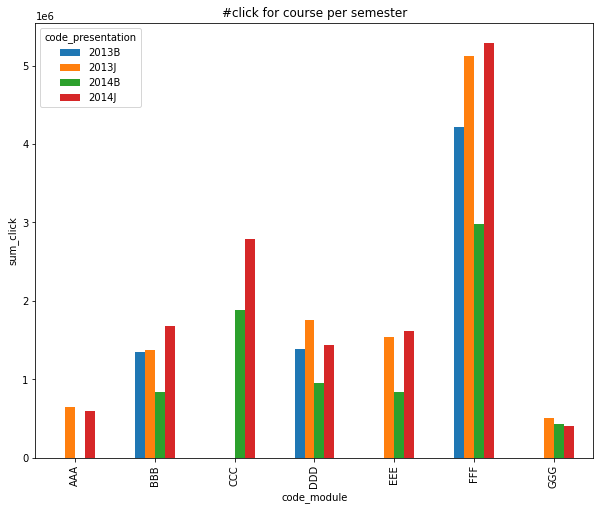

In [69]:
totalNumber.plot(kind = "bar",ylabel = "sum_click", title = "#click for course per semester" , figsize = (10,8))

**TASK2**: As a follow up to the first task, identify the courses in which the total number of clicks is higher in 2014 than 2013. If the course was taught two times in the same year (such as, 2013B and 2013J) use the average of both semesters (`(2013B+2013J)/2`) to compare with the other year.

In [70]:
totalNumber["avg2013"] = totalNumber.iloc[:,:2].mean(axis = 1)  # add average of 2013 into dataframe
totalNumber["avg2014"] = totalNumber.iloc[:,2:4].mean(axis = 1) # add average of 2013 into dataframe

In [71]:
totalNumber

code_presentation,2013B,2013J,2014B,2014J,avg2013,avg2014
code_module,,,,,,
AAA,0.0,648494.0,0.0,598158.0,324247.0,299079.0
BBB,1347911.0,1378656.0,833865.0,1673744.0,1363283.5,1253804.5
CCC,0.0,0.0,1889177.0,2792972.0,0.0,2341074.5
DDD,1387467.0,1757214.0,947657.0,1437751.0,1572340.5,1192704.0
EEE,0.0,1535953.0,832038.0,1616236.0,767976.5,1224137.0
FFF,4220055.0,5116439.0,2975619.0,5281809.0,4668247.0,4128714.0
GGG,0.0,509091.0,425165.0,399628.0,254545.5,412396.5


In [72]:
totalNumber[totalNumber["avg2014"] > totalNumber["avg2013"]]

code_presentation,2013B,2013J,2014B,2014J,avg2013,avg2014
code_module,,,,,,
CCC,0.0,0.0,1889177.0,2792972.0,0.0,2341074.5
EEE,0.0,1535953.0,832038.0,1616236.0,767976.5,1224137.0
GGG,0.0,509091.0,425165.0,399628.0,254545.5,412396.5


In [73]:
totalNumber[totalNumber["avg2014"] > totalNumber["avg2013"]].index
# For module CCC, EEE and GGG increase in 2014

Index(['CCC', 'EEE', 'GGG'], dtype='object', name='code_module')

**TASK3:** Which type of resources were mostly clicked by the students? Do you observe a common pattern accross courses (e.g., in almost all courses, clicks on `resource` is  higher than `quiz`)?

In [74]:
courseComp.head(1)

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource


In [75]:
cpat = studentMoodle.merge(courseComp, on = ["id_site","code_module","code_presentation"])

In [76]:
cpat = cpat.groupby(["activity_type","code_module"]).sum()[["sum_click"]].unstack()

In [77]:
cpat = cpat.droplevel(level = 0,axis = 1)

In [78]:
cpat

code_module,AAA,BBB,CCC,DDD,EEE,FFF,GGG
activity_type,,,,,,,
dataplus,3398.0,NaN,NaN,NaN,NaN,44070.0,NaN
dualpane,NaN,NaN,NaN,NaN,4871.0,15845.0,NaN
externalquiz,NaN,NaN,NaN,64292.0,NaN,NaN,NaN
folder,NaN,NaN,NaN,NaN,NaN,5420.0,NaN
forumng,337103.0,2109720.0,643094.0,1493375.0,792656.0,2358160.0,239282.0
glossary,656.0,9820.0,NaN,63336.0,NaN,6142.0,8008.0
homepage,266720.0,1136792.0,756032.0,1433206.0,654525.0,2418335.0,283454.0
htmlactivity,NaN,NaN,NaN,NaN,NaN,9239.0,NaN
oucollaborate,498.0,12556.0,9822.0,53390.0,6920.0,25788.0,NaN


In [79]:
cpat.dropna().index 
# 'forumng', 'homepage', 'oucontent', 'resource', 'subpage' are used in all classes

Index(['forumng', 'homepage', 'oucontent', 'resource', 'subpage'], dtype='object', name='activity_type')

In [80]:
cpat.notnull().sum(axis = 0).sort_values() 
# FFF uses 18 diffrent activities, GGG uses only 7

code_module
GGG     7
AAA     9
CCC     9
EEE    11
BBB    12
DDD    12
FFF    18
dtype: int64

**TASK4:** For each student, compute the total number of clicks per each course component type (`activity_type` column in `moodle.csv`) separately for each course and semester. A simple representation of the expected table is provided below with fake data (note that in the given example columns and rows are incomplete). 

| Student Id | code_module | code_presentation | PDF | Assignment
| --- | --- | --- | --- | --- |
| 1234 | AAA | 2013J | 23 | 33 |
| 1234 | BBB | 2014B | 5 | 42 |
   
Note that, in this task you actually create some features that can be used for predictive modeling.

In [81]:
studentMoodle.head(1)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4


In [82]:
courseComp.head(1)

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource


In [83]:
activityMerge = courseComp.merge(studentMoodle, on = ["id_site","code_module","code_presentation"])

In [84]:
actMer = activityMerge.groupby(["id_student","code_module","code_presentation","activity_type"])[["sum_click"]].sum()
actMer
# Join two dataframe by "id_site","code_module" and "code_presentation"

sum_click
id_student code_module code_presentation activity_type           
6516       AAA         2014J             dataplus              21
                                         forumng              451
                                         homepage             497
                                         oucontent           1505
                                         resource              31
...                                                           ...
2698588    BBB         2014J             oucollaborate          7
                                         oucontent            233
                                         resource              49
                                         subpage               76
                                         url                    2

[240357 rows x 1 columns]

In [85]:
actMer = actMer.unstack().reset_index().droplevel(level = 0,axis = 1).fillna(0) # add 0 instead of NaN value

In [86]:
actMer.columns = pd.Index("id_student code_module code_presentation".split() + list(actMer.columns[3:]))

In [87]:
actMer.head()
# More clear 

,id_student,code_module,code_presentation,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,6516,AAA,2014J,21.0,0.0,0.0,0.0,451.0,0.0,497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,143.0,143.0
1,8462,DDD,2013J,0.0,0.0,12.0,0.0,36.0,0.0,184.0,...,0.0,18.0,0.0,0.0,0.0,0.0,70.0,0.0,227.0,23.0
2,8462,DDD,2014J,0.0,0.0,0.0,0.0,2.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11391,AAA,2013J,0.0,0.0,0.0,0.0,193.0,0.0,138.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0
4,23629,BBB,2013B,0.0,0.0,0.0,0.0,87.0,0.0,36.0,...,0.0,0.0,0.0,0.0,31.0,0.0,2.0,0.0,5.0,0.0


**TASK5:** Using proper visualizations and statistical analysis, please explore if there is any relationship between students' course performance (`final_result` column in `studentInfo.csv`) and clicks on different resources.

In [88]:
actMerResult = actMer.merge(studentInfo[["id_student","final_result"]], on = "id_student")

In [89]:
actMerResult.head(4)

,id_student,code_module,code_presentation,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result
0,6516,AAA,2014J,21.0,0.0,0.0,0.0,451.0,0.0,497.0,...,0.0,0.0,0.0,0.0,0.0,31.0,0.0,143.0,143.0,Pass
1,8462,DDD,2013J,0.0,0.0,12.0,0.0,36.0,0.0,184.0,...,18.0,0.0,0.0,0.0,0.0,70.0,0.0,227.0,23.0,Withdrawn
2,8462,DDD,2013J,0.0,0.0,12.0,0.0,36.0,0.0,184.0,...,18.0,0.0,0.0,0.0,0.0,70.0,0.0,227.0,23.0,Withdrawn
3,8462,DDD,2014J,0.0,0.0,0.0,0.0,2.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Withdrawn


In [90]:
resAct = actMerResult.groupby("final_result").mean().drop("id_student",axis = 1).round(2)

In [91]:
resAct

,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
final_result,,,,,,,,,,,,,,,,,,,,
Distinction,4.47,1.31,2.67,0.23,603.93,5.88,453.18,0.44,5.84,667.52,1.29,69.22,3.56,5.14,479.92,0.0,58.88,0.01,186.02,33.70
Fail,0.25,0.40,1.41,0.08,119.29,1.18,123.95,0.17,1.67,187.71,0.96,14.33,1.50,0.74,133.75,0.0,24.54,0.00,70.98,11.05
Pass,2.18,0.94,2.96,0.30,349.05,3.88,314.21,0.31,5.16,526.54,1.68,43.77,2.47,2.82,336.59,0.0,51.16,0.01,151.59,25.27
Withdrawn,0.23,0.33,1.29,0.05,118.44,1.23,113.86,0.26,1.90,160.66,0.61,17.38,1.22,0.60,96.68,0.0,20.34,0.00,59.99,10.28


<AxesSubplot:>

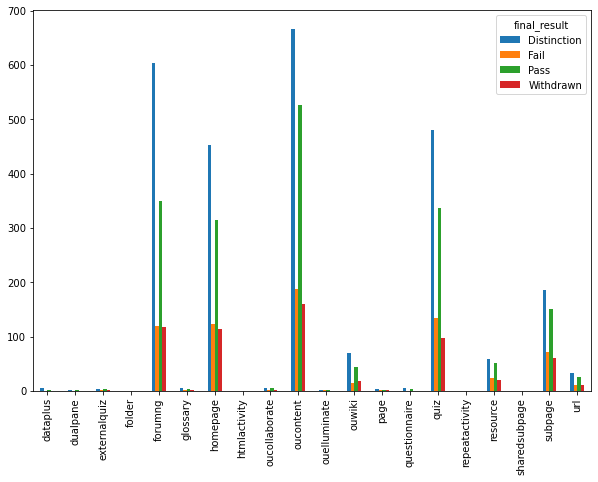

In [92]:
resAct.T.plot(kind = "bar", figsize = (10,7))
# successful students(Distinction) used course activities more

## 2. Predictive Modeling

In this section, you will build a machine learning model to predict students' final course outcome (`final_result` column in `studentInfo.csv`). That is, whether student is 'Pass', 'Withdrawn', 'Fail', or 'Distinction'. If you consider the number of students in some of these categories are too few, you can combine them into a new category.

### 2.1. Generate Features from Demographic Information

In Section 1.2, you explored demographic data about students and tuned some categorical variables. From these categorical variables, please generate *at least* **10** *dummy* variables to be used for predictors in the machine learning model.

In [93]:
studentInfo.head(3)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,Above Than A Level,80-100%,35<,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,Above Than A Level,20-40%,35<,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,20-40%,35<,0,60,Y,Withdrawn


In [94]:
dumStu = pd.get_dummies(studentInfo[["id_student","highest_education","imd_band","age_band"]])

In [95]:
dumStu.head() # Dummies value of "highest_education","imd_band","age_band" 

,id_student,highest_education_A Level or Equivalent,highest_education_Above Than A Level,highest_education_Lower Than A Level,imd_band_0-20%,imd_band_20-40%,imd_band_40-60%,imd_band_60-80%,imd_band_80-100%,age_band_0-35,age_band_35<
0,11391,0,1,0,0,0,0,0,1,0,1
1,28400,0,1,0,0,1,0,0,0,0,1
2,30268,1,0,0,0,1,0,0,0,0,1
3,31604,1,0,0,0,0,1,0,0,0,1
4,32885,0,0,1,0,0,1,0,0,1,0


### 2.2. Generate/Select Features from Click Data

In Section 1.5, you have already created some features from students' click behaviour. You can use all of them here as additional predictors. 

Additionally, you should create *at least* **3** features indicating the engagement level of students at different course components. Some example features are provided below :

* a dummy variable that indicates if students clicked at least three types of course components or not, 
* each student's average number of clicks across all components per a single course and semester,
* a dummy variable indicating if students clicked all types of course components.

There is no limit in the type and number of additional feature you can generate from the click data.

In [96]:
actMerResult.head(5)

,id_student,code_module,code_presentation,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result
0,6516,AAA,2014J,21.0,0.0,0.0,0.0,451.0,0.0,497.0,...,0.0,0.0,0.0,0.0,0.0,31.0,0.0,143.0,143.0,Pass
1,8462,DDD,2013J,0.0,0.0,12.0,0.0,36.0,0.0,184.0,...,18.0,0.0,0.0,0.0,0.0,70.0,0.0,227.0,23.0,Withdrawn
2,8462,DDD,2013J,0.0,0.0,12.0,0.0,36.0,0.0,184.0,...,18.0,0.0,0.0,0.0,0.0,70.0,0.0,227.0,23.0,Withdrawn
3,8462,DDD,2014J,0.0,0.0,0.0,0.0,2.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Withdrawn
4,8462,DDD,2014J,0.0,0.0,0.0,0.0,2.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Withdrawn


In [97]:
filtLeast3 = (actMerResult.loc[:,"dataplus":"url"] > 0).sum(axis = 1) > 3
# students clicked at least three types of course components
filtTop5 = ((actMerResult["resource subpage oucontent url forumng".split()]) > 0).sum(axis = 1) == 5
# students clicked top 5 course components

Avg_Ou = actMerResult.loc[:, "oucontent"].mean()
#Average of Ou content
filtAvg_Oucontent = (actMerResult.loc[:, "oucontent"] > Avg_Ou)
# Student clicked more than Oucontent average cliked

In [98]:
actMerResult.loc[(filtLeast3),"filtLeast3"] = 1

In [99]:
actMerResult.loc[filtTop5,"filtTop5"] = 1

In [100]:
actMerResult.loc[filtAvg_Oucontent,"filtAvg_Oucontent"] = 1

In [101]:
actMerResult = actMerResult.fillna(0) 

In [102]:
actMerResult.head()

,id_student,code_module,code_presentation,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,quiz,repeatactivity,resource,sharedsubpage,subpage,url,final_result,filtLeast3,filtTop5,filtAvg_Oucontent
0,6516,AAA,2014J,21.0,0.0,0.0,0.0,451.0,0.0,497.0,...,0.0,0.0,31.0,0.0,143.0,143.0,Pass,1.0,1.0,1.0
1,8462,DDD,2013J,0.0,0.0,12.0,0.0,36.0,0.0,184.0,...,0.0,0.0,70.0,0.0,227.0,23.0,Withdrawn,1.0,1.0,0.0
2,8462,DDD,2013J,0.0,0.0,12.0,0.0,36.0,0.0,184.0,...,0.0,0.0,70.0,0.0,227.0,23.0,Withdrawn,1.0,1.0,0.0
3,8462,DDD,2014J,0.0,0.0,0.0,0.0,2.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Withdrawn,0.0,0.0,0.0
4,8462,DDD,2014J,0.0,0.0,0.0,0.0,2.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Withdrawn,0.0,0.0,0.0


In [103]:
actMerResult = actMerResult.iloc[:,[0,-4,-3,-2,-1]].merge(dumStu, on = "id_student", how = "inner")

In [104]:
actMerResult = actMerResult.drop_duplicates()

In [105]:
actMerResult

,id_student,final_result,filtLeast3,filtTop5,filtAvg_Oucontent,highest_education_A Level or Equivalent,highest_education_Above Than A Level,highest_education_Lower Than A Level,imd_band_0-20%,imd_band_20-40%,imd_band_40-60%,imd_band_60-80%,imd_band_80-100%,age_band_0-35,age_band_35<
0,6516,Pass,1.0,1.0,1.0,0,1,0,0,0,0,0,1,0,1
1,8462,Withdrawn,1.0,1.0,0.0,0,1,0,0,1,0,0,0,0,1
5,8462,Withdrawn,0.0,0.0,0.0,0,1,0,0,1,0,0,0,0,1
9,11391,Pass,1.0,1.0,1.0,0,1,0,0,0,0,0,1,0,1
10,23629,Fail,1.0,0.0,0.0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50686,2698535,Pass,1.0,1.0,0.0,0,0,1,0,0,1,0,0,1,0
50688,2698535,Withdrawn,1.0,1.0,1.0,0,0,1,0,0,1,0,0,1,0
50690,2698535,Pass,1.0,1.0,1.0,0,0,1,0,0,1,0,0,1,0
50692,2698577,Fail,1.0,1.0,0.0,0,0,1,0,0,1,0,0,0,1


### 2.3. Training and Testing the Model

As the last activity in this project, you are expected to train and test a logistic regression model for predicting students' final course status. You should use 10-fold cross-validation.

Interpret the results based on confusion matrix and AUC scores. In your interpretation, please also mention the features with high predictive power and those with low predictive power.

Please note that the achiving low/high accuracy in the predictions has no importance for your grade.

In [106]:
actMerResult.loc[(actMerResult["final_result"] == "Distinction") | (actMerResult["final_result"] == "Pass"), "final_result"] = 1

In [107]:
actMerResult.loc[(actMerResult["final_result"] == "Withdrawn") | (actMerResult["final_result"] == "Fail"), "final_result"] = 0

In [108]:
actMerResult = actMerResult.applymap(lambda x: int(x))

In [109]:
actMerResult.head()

,id_student,final_result,filtLeast3,filtTop5,filtAvg_Oucontent,highest_education_A Level or Equivalent,highest_education_Above Than A Level,highest_education_Lower Than A Level,imd_band_0-20%,imd_band_20-40%,imd_band_40-60%,imd_band_60-80%,imd_band_80-100%,age_band_0-35,age_band_35<
0,6516,1,1,1,1,0,1,0,0,0,0,0,1,0,1
1,8462,0,1,1,0,0,1,0,0,1,0,0,0,0,1
5,8462,0,0,0,0,0,1,0,0,1,0,0,0,0,1
9,11391,1,1,1,1,0,1,0,0,0,0,0,1,0,1
10,23629,0,1,0,0,0,0,1,0,1,0,0,0,1,0


In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X = actMerResult.drop(columns=['final_result', 'id_student'])
y = actMerResult.loc[:,"final_result"]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y
                                                   ,random_state = 0)

In [113]:
print(len(X_train),len(X_test))

22605 7535


In [114]:
import sklearn.neighbors

In [115]:
knn_classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train,y_train)
knn_classifier.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_classifier,X = X
                        ,y = y
                        , cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.63304579 0.63039151 0.62143331 0.61811546 0.61911082 0.61380226
 0.61081619 0.64963504 0.71366954 0.60053086]
Accuracy: 0.63 (+/- 0.03)


In [116]:
from sklearn import linear_model

In [117]:
classifier = linear_model.LogisticRegression(penalty = "l1", solver = "liblinear", tol = 0.05, random_state = 0)
classifier.fit(X_train, y_train)

predicted = classifier.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test, predicted))
#AUC scores

0.6557398805573988


In [118]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [119]:
y_pred = cross_val_predict(classifier, X_test, y_test, cv=10)
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat
#  confusion matrix

array([[2578, 1082],
       [1515, 2360]], dtype=int64)

In [120]:
feature_importance = pd.DataFrame()
feature_importance['coef_'] = pd.DataFrame(data={'coef_': classifier.coef_[0]})[['coef_']]
feature_importance['feature']= X.columns
feature_importance.sort_values('coef_')

,coef_,feature
5,-0.974172,highest_education_Lower Than A Level
6,-0.812186,imd_band_0-20%
7,-0.619146,imd_band_20-40%
3,-0.487563,highest_education_A Level or Equivalent
4,-0.473942,highest_education_Above Than A Level
8,-0.460213,imd_band_40-60%
9,-0.414826,imd_band_60-80%
10,-0.320912,imd_band_80-100%
11,-0.306403,age_band_0-35
12,-0.125211,age_band_35<
